In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("/kaggle/input/cambridge-crime-data-2009-2024/Crime_Reports_20240701.csv")
data.head()

,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location
0,2009-01323,02/21/2009 09:53:00 AM,02/21/2009 09:20 - 09:30,Threats,105.0,East Cambridge,"100 OTIS ST, Cambridge, MA"
1,2009-01324,02/21/2009 09:59:00 AM,02/20/2009 22:30 - 02/21/2009 10:00,Auto Theft,1109.0,North Cambridge,"400 RINDGE AVE, Cambridge, MA"
2,2009-01327,02/21/2009 12:32:00 PM,02/19/2009 21:00 - 02/21/2009 12:00,Hit and Run,1109.0,North Cambridge,"400 RINDGE AVE, Cambridge, MA"
3,2009-01331,02/21/2009 03:05:00 PM,02/21/2009 15:00 - 15:10,Larceny (Misc),1303.0,Strawberry Hill,"0 NORUMBEGA ST, Cambridge, MA"
4,2009-01346,02/22/2009 05:02:00 AM,02/22/2009 05:02,OUI,105.0,East Cambridge,"FIFTH ST & GORE ST, Cambridge, MA"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95923 entries, 0 to 95922
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   File Number      95923 non-null  object 
 1   Date of Report   95923 non-null  object 
 2   Crime Date Time  95912 non-null  object 
 3   Crime            95923 non-null  object 
 4   Reporting Area   95915 non-null  float64
 5   Neighborhood     95915 non-null  object 
 6   Location         95628 non-null  object 
dtypes: float64(1), object(6)
memory usage: 5.1+ MB


## Lets deal null or empty values.

In [4]:
data.isnull().sum()

File Number          0
Date of Report       0
Crime Date Time     11
Crime                0
Reporting Area       8
Neighborhood         8
Location           295
dtype: int64

In [5]:
# Let's drop the rows with empty 'Crime Date Time' and 'Location' column.
data=data[~data['Crime Date Time'].isnull()]
data=data[~data['Location'].isnull()]

In [6]:
#Lets fill in empty values in reporting area and Neighborhood
data['Reporting Area']=data['Reporting Area'].fillna(data['Reporting Area'].mean())
data['Neighborhood']=data['Neighborhood'].fillna(data['Neighborhood'].mode()[0])

In [7]:
data.isnull().sum()

File Number        0
Date of Report     0
Crime Date Time    0
Crime              0
Reporting Area     0
Neighborhood       0
Location           0
dtype: int64

In [8]:
# Let's convert columns 'Date of Report' and 'Crime Date Time' to datetime
data['Date of Report'] = pd.to_datetime(data['Date of Report'], errors='coerce')
data['Crime Date Time'] = pd.to_datetime(data['Crime Date Time'], errors='coerce')

/tmp/ipykernel_18/2260129961.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Crime Date Time'] = pd.to_datetime(data['Crime Date Time'], errors='coerce')


In [9]:
print(data.dtypes)

File Number                object
Date of Report     datetime64[ns]
Crime Date Time    datetime64[ns]
Crime                      object
Reporting Area            float64
Neighborhood               object
Location                   object
dtype: object


## Exploratory Data Analysis

In [10]:
data.head()

,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location
0,2009-01323,2009-02-21 09:53:00,NaT,Threats,105.0,East Cambridge,"100 OTIS ST, Cambridge, MA"
1,2009-01324,2009-02-21 09:59:00,NaT,Auto Theft,1109.0,North Cambridge,"400 RINDGE AVE, Cambridge, MA"
2,2009-01327,2009-02-21 12:32:00,NaT,Hit and Run,1109.0,North Cambridge,"400 RINDGE AVE, Cambridge, MA"
3,2009-01331,2009-02-21 15:05:00,NaT,Larceny (Misc),1303.0,Strawberry Hill,"0 NORUMBEGA ST, Cambridge, MA"
4,2009-01346,2009-02-22 05:02:00,2009-02-22 05:02:00,OUI,105.0,East Cambridge,"FIFTH ST & GORE ST, Cambridge, MA"


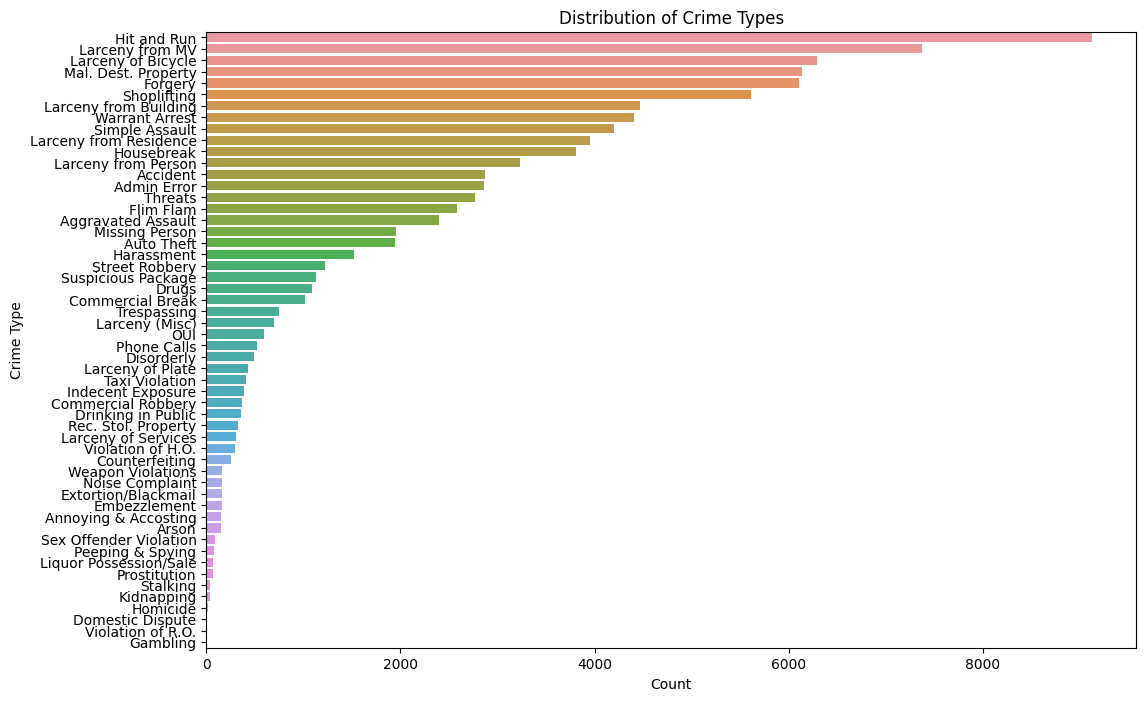

In [11]:
# Plot the distribution of crime types
plt.figure(figsize=(12, 8))
sns.countplot(y='Crime', data=data, order=data['Crime'].value_counts().index)
plt.title('Distribution of Crime Types')
plt.xlabel('Count')
plt.ylabel('Crime Type')
plt.show()

/tmp/ipykernel_18/4191819540.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Date of Report'].value_counts().resample('M').sum().plot()


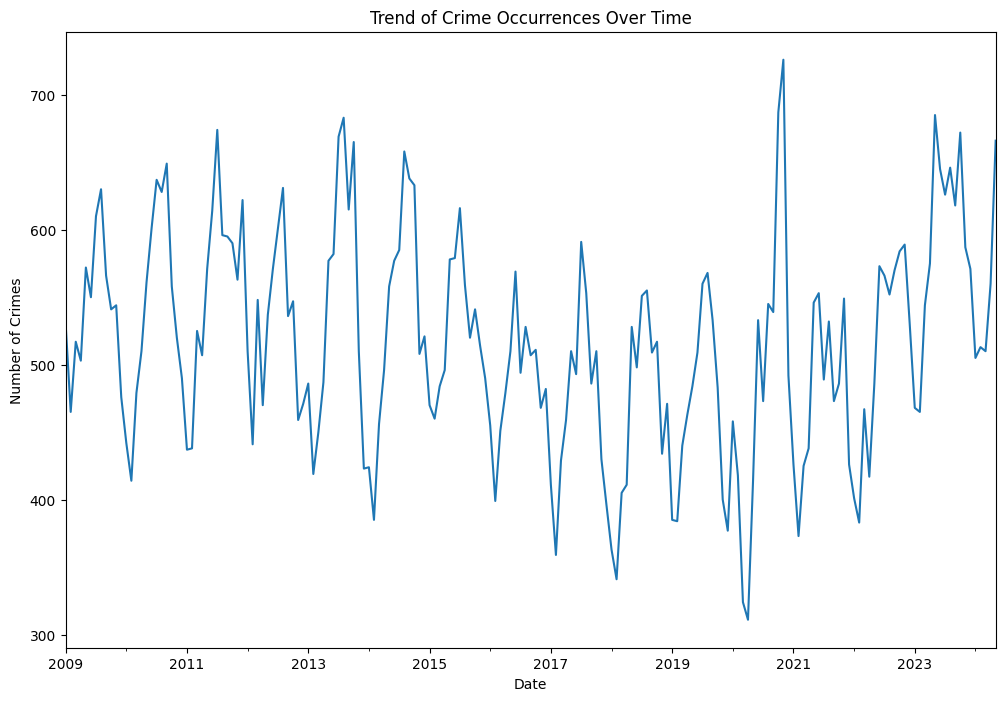

In [12]:
# Plot the trend of crime occurrences over time
plt.figure(figsize=(12, 8))
data['Date of Report'].value_counts().resample('M').sum().plot()
plt.title('Trend of Crime Occurrences Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()

([<matplotlib.patches.Wedge at 0x7c36a3823df0>,
 [Text(0.966899650152551, 0.5245045915288777, 'Hit and Run'),
  Text(0.19174086671811394, 1.0831599328031787, 'Larceny from MV'),
  Text(-0.5928083273517575, 0.9265949962213328, 'Larceny of Bicycle'),
  Text(-1.04250493151727, 0.35097502441366435, 'Mal. Dest. Property'),
  Text(-1.0362271101017395, -0.36909805782501437, 'Forgery'),
  Text(-0.6120643978484104, -0.9139897006457255, 'Shoplifting'),
  Text(-0.04526906521257542, -1.0990681105986015, 'Larceny from Building'),
  Text(0.470661984423008, -0.9942219553092742, 'Warrant Arrest'),
  Text(0.8692061907498758, -0.6741517618178348, 'Simple Assault'),
  Text(1.074582543034521, -0.2351007405463913, 'Larceny from Residence')],
 [Text(0.5273998091741187, 0.286093413561206, '15.82%'),
  Text(0.1045859273007894, 0.5908145088017338, '12.78%'),
  Text(-0.32334999673732223, 0.5054154524843633, '10.91%'),
  Text(-0.5686390535548745, 0.19144092240745325, '10.63%'),
  Text(-0.5652147873282215, -0.201

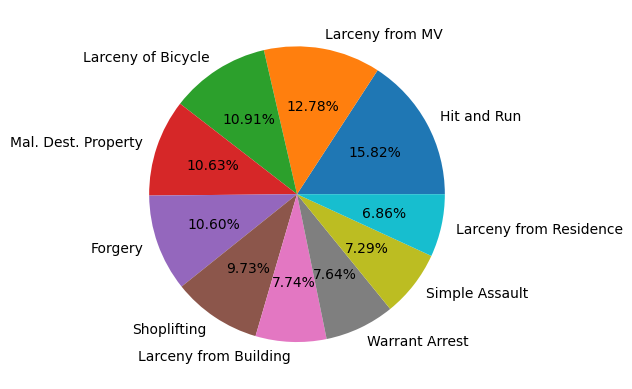

In [13]:
crime_type=data['Crime'].value_counts().index
crime_freq=data['Crime'].value_counts().values

plt.pie(x=crime_freq[:10], labels=crime_type[:10], autopct="%1.2f%%")

#### From the above pie chart, we can conclude that: Hit and Run is the most frequent crime followed up by Larceny

### Finding out the most frequent crime in a particular area.

In [14]:
data.columns

Index(['File Number', 'Date of Report', 'Crime Date Time', 'Crime',
       'Reporting Area', 'Neighborhood', 'Location'],
      dtype='object')

In [15]:
def crime_freq_in_area(value):
    area_data=data[data['Neighborhood']==value]
    top_crime_in_area=area_data['Crime'].value_counts().head(5)
    return top_crime_in_area

name=input("Mention the area: ")
print("The most common crimes in area", name ,"is: ")
crime_freq_in_area(name)

StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

### Comparing crime in two different areas.

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Neighborhood', data=data, order=data['Neighborhood'].value_counts().index)
plt.title('Distribution of Crime Occurrences by Neighborhood')
plt.xlabel('Count')
plt.ylabel('Neighborhood')
plt.show()

In [ ]:
neighborhood_type=data['Neighborhood'].value_counts().index
neighborhood_freq=data['Neighborhood'].value_counts().values

plt.pie(x=neighborhood_freq[:10], labels=neighborhood_type[:10], autopct="%1.2f%%")

### From the above chart we can conclude that Cambridgeport has the highest crime rate followed up by East Cambridge and North Cambridge.

In [ ]:
sns.barplot(x='Reporting Area', y='Neighborhood', data=data)